In [13]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [63]:
rt = '../datasets/rotten_tomatoes_sycophantic_activations.pkl'
mrpc = '../datasets/MRPC_sycophantic_activations.pkl'

df_rt = pd.read_pickle(rt)
df_rt = df_rt.dropna()
df_rt_sycophantic = df_rt[df_rt['sycophancy'] == 1]
df_rt_not_sycophantic = df_rt[df_rt['sycophancy'] == 0]

df_mrpc = pd.read_pickle(mrpc)
df_mrpc = df_mrpc.dropna()
df_mrpc_sycophantic = df_mrpc[df_mrpc['sycophancy'] == 1]
df_mrpc_not_sycophantic = df_mrpc[df_mrpc['sycophancy'] == 0]

In [64]:
def get_reading(df, probe, layer):
    reading = []
    for _, row in df.iterrows():
        reading.append(probe((row['activations'][layer]).to('cuda')).item())
    return reading

def plot(sycophantic_reading, not_sycophantic_reading):
    #plot the results
    plt.hist(sycophantic_reading, bins=100, alpha=0.5, label='sycophantic')
    plt.hist(not_sycophantic_reading, bins=100, alpha=0.5, label='not sycophantic')
    plt.legend(loc='upper right')
    #vertical line at 0
    plt.axvline(x=0.5, color='k', linestyle='--')
    plt.show()

    diff = [x - y for x, y in zip(sycophantic_reading, not_sycophantic_reading)]
    plt.hist(diff, bins=100, alpha=0.5, label='difference')
    plt.legend(loc='upper right')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.show()

    #print the number of positive elements in diff
    print('Percentage of correctly classified sample: {:.2f}%'.format(sum([1 for x in diff if x > 0])/len(diff)*100))


In [73]:
layer_v1 = 16
probe_v1 = torch.load('checkpoints/probe_v1_{}.pt'.format(layer_v1))
probe_v1 = probe_v1[0]
layer_v2 = 18
probe_v2 = torch.load('checkpoints/probe_v2_{}.pt'.format(layer_v2))
probe_v2 = probe_v2[0]
layer_v3 = 17
probe_v3 = torch.load('checkpoints/probe_v3_{}.pt'.format(layer_v3))
probe_v3 = probe_v3[0]

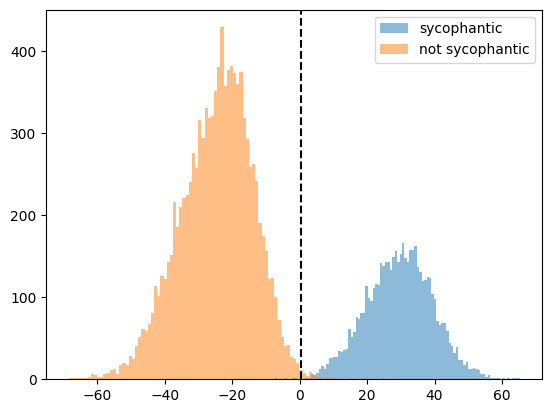

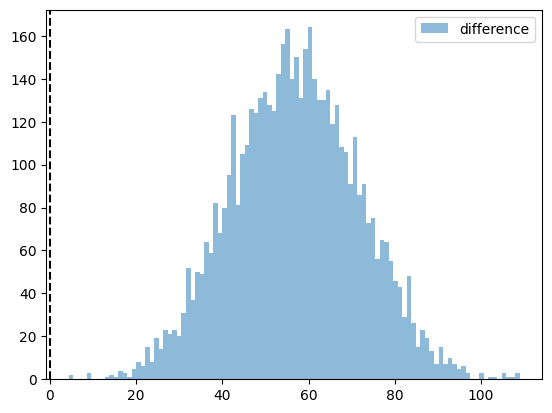

Percentage of correctly classified sample: 100.00%


In [74]:
sycophantic_reading = get_reading(df_rt_sycophantic, probe_v1, layer_v1)
not_sycophantic_reading = get_reading(df_rt_not_sycophantic, probe_v1, layer_v1)
plot(sycophantic_reading, not_sycophantic_reading)

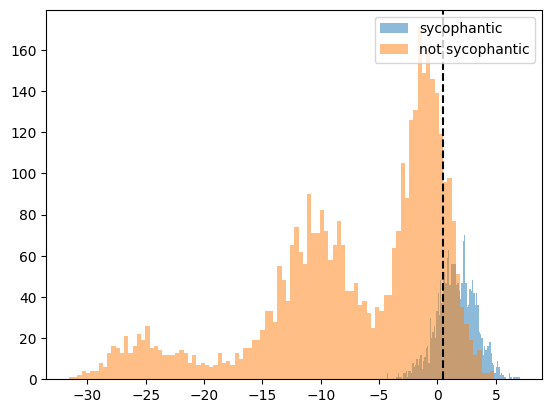

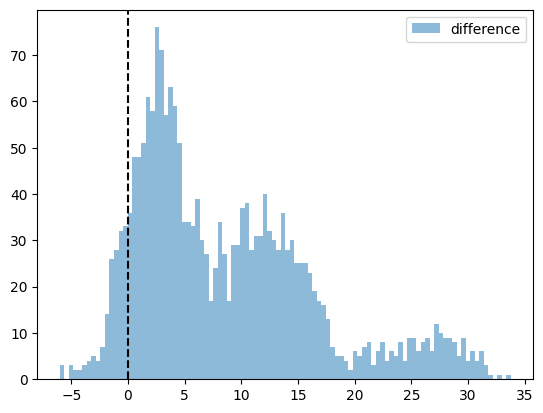

Percentage of correctly classified sample: 91.60%


In [75]:
sycophantic_reading = get_reading(df_mrpc_sycophantic, probe_v2, layer_v2)
not_sycophantic_reading = get_reading(df_mrpc_not_sycophantic, probe_v2, layer_v2)
plot(sycophantic_reading, not_sycophantic_reading)

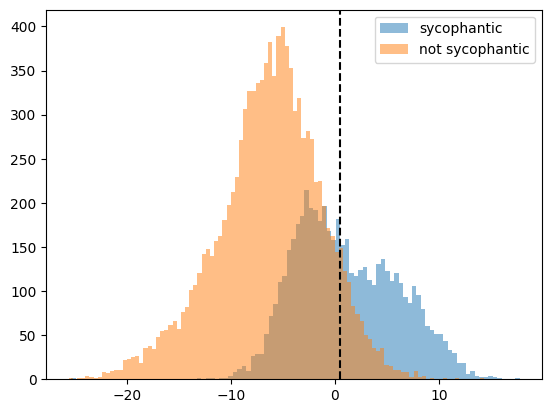

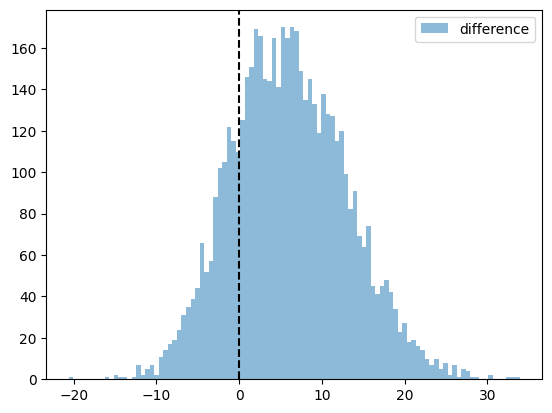

Percentage of correctly classified sample: 80.10%


In [66]:
sycophantic_reading = get_reading(df_rt_sycophantic, probe_v2, layer_v2)
not_sycophantic_reading = get_reading(df_rt_not_sycophantic, probe_v2, layer_v2)
plot(sycophantic_reading, not_sycophantic_reading)

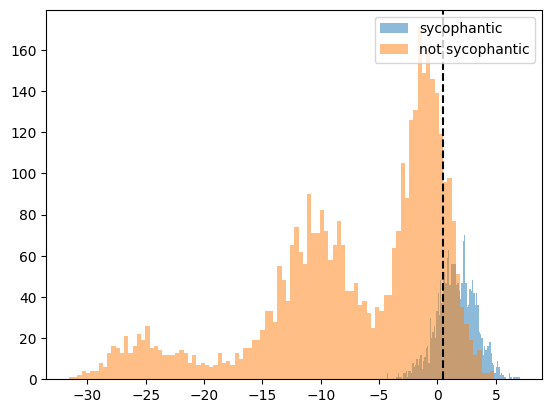

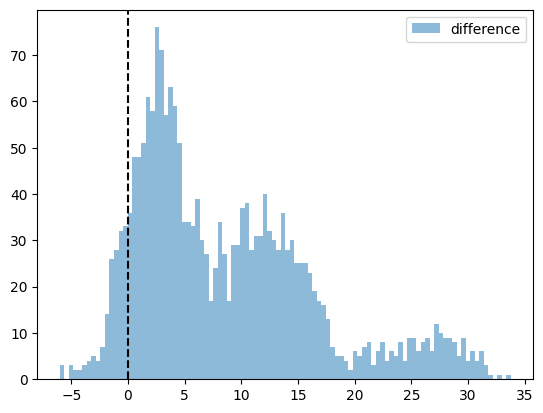

Percentage of correctly classified sample: 91.60%


In [68]:
sycophantic_reading = get_reading(df_mrpc_sycophantic, probe_v2, layer_v2)
not_sycophantic_reading = get_reading(df_mrpc_not_sycophantic, probe_v2, layer_v2)
plot(sycophantic_reading, not_sycophantic_reading)

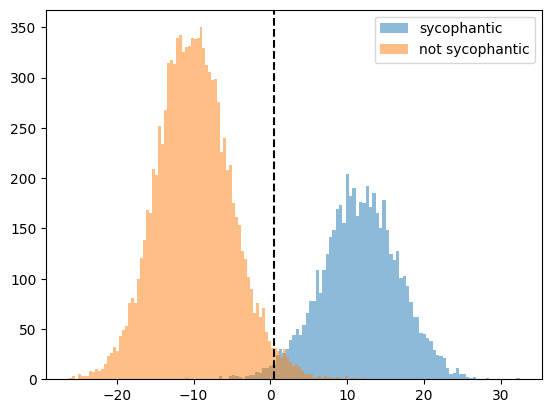

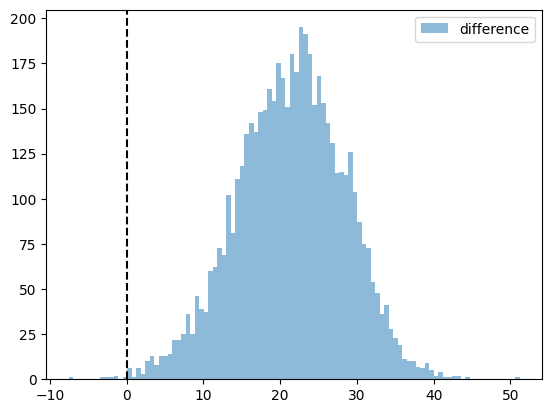

Percentage of correctly classified sample: 99.87%


In [71]:
sycophantic_reading = get_reading(df_rt_sycophantic, probe_v3, layer_v3)
not_sycophantic_reading = get_reading(df_rt_not_sycophantic, probe_v3, layer_v3)
plot(sycophantic_reading, not_sycophantic_reading)

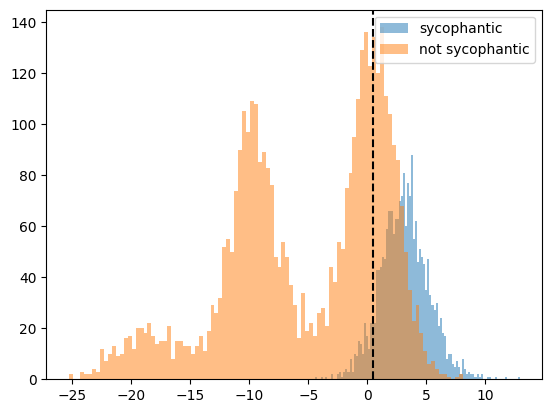

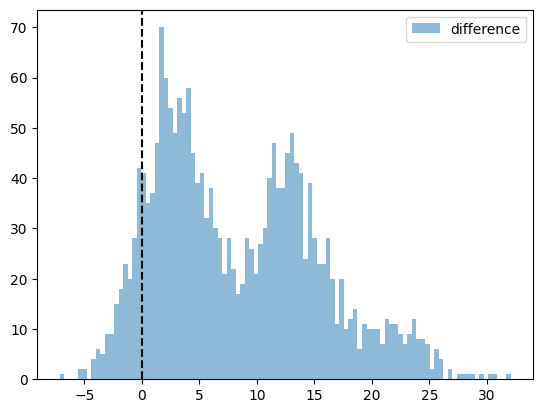

Percentage of correctly classified sample: 90.50%


In [72]:
sycophantic_reading = get_reading(df_mrpc_sycophantic, probe_v3, layer_v3)
not_sycophantic_reading = get_reading(df_mrpc_not_sycophantic, probe_v3, layer_v3)
plot(sycophantic_reading, not_sycophantic_reading)